In [1]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Save file path to variable
pokemon = "Pokemon.csv"
sales = "GameSales.csv"

In [4]:
# Read with Pandas
pokemon_pd = pd.read_csv(pokemon)
pokemon_pd.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Read with Pandas
sales_pd = pd.read_csv(sales,nrows=1000)
sales_pd.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [6]:
poke_sales=sales_pd[sales_pd['Name'].str.contains('Pokemon')]
poke_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,G,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NaN,NaN,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.51,3.18,5.66,0.80,15.14,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dropping Ratings and Critic Score
poke_sales2 = poke_sales[["Name", "Platform", "Year_of_Release",
                           "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
poke_sales2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,Pokemon Gold/Pokemon Silver,G,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.51,3.18,5.66,0.80,15.14


https://seaborn.pydata.org/examples/faceted_lineplot.html

Pokemon performance over time vs General Game Performance by Region



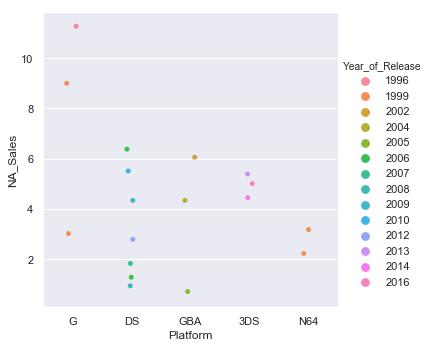

In [8]:
sns.catplot(x="Platform", y="NA_Sales", hue="Year_of_Release", data=poke_sales2);

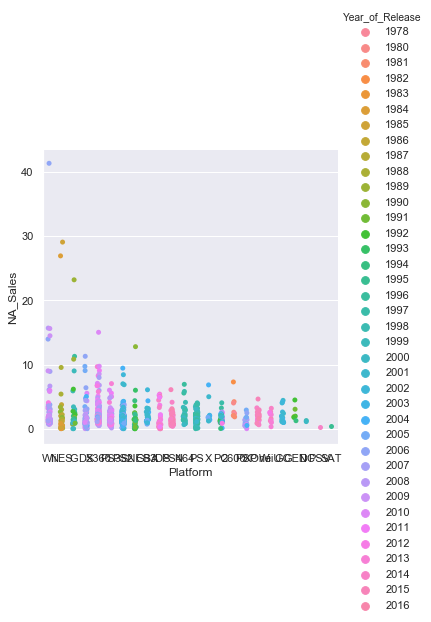

In [9]:
sns.catplot(x="Platform", y="NA_Sales", hue="Year_of_Release", data=sales_pd);

In [53]:
sns.catplot(x="Platform", y="NA_Sales", hue="Year_of_Release", data=sales_pd[(sales_pd['Platform'])];

fg=sns.catplot('Platform', data=sales_pd[(sales_pd['Platform']=='G') | sales_pd['Platform']=='DS') | sales_pd['Platform']=='GBA')], kind='count')

plt.show()

SyntaxError: invalid syntax (<ipython-input-53-a71a5cb5ae4e>, line 1)

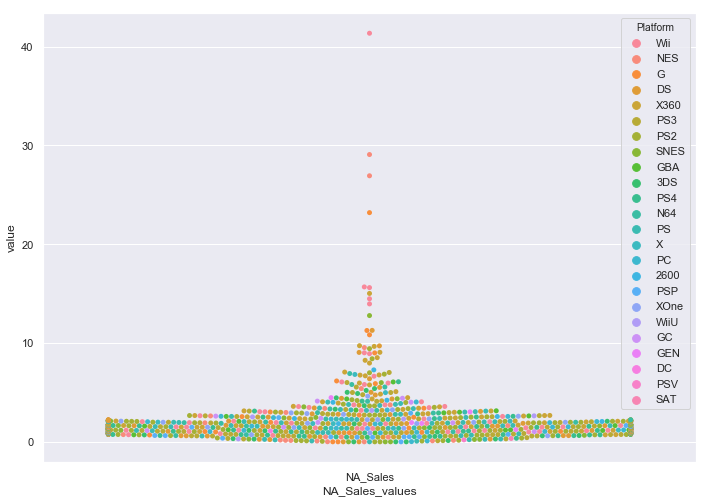

In [11]:
#Code to produce swamplot:
##########
# "Melt" the dataset to "long-form" or "tidy" representation
swarmpt = pd.melt(sales_pd, id_vars=["Platform"], value_vars=["NA_Sales"] ,var_name="NA_Sales_values")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="NA_Sales_values", y="value", hue="Platform",
              data=swarmpt)
#############################